# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pysrt
!pip install textatistic
!pip install textstat
import textstat
from textstat.textstat import textstatistics
from textatistic import Textatistic
import pandas as pd
import zipfile
import os
import pysrt
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from collections import Counter
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from scipy import spatial

from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import spacy

from sklearn.metrics import cohen_kappa_score

!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')

!pip install catboost
!pip install eli5
!pip install shap
import shap
import eli5
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler
)
from sklearn.svm import SVC, SVR
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Mean and standard deviation cross validation function

In [ ]:
# mean std cross validation function
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

scoring_metrics = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "r2": "r2",
}

# Load the course and chapter level data frame

In [ ]:
#read data + data cleaning
chapter_df = pd.read_csv("/content/drive/MyDrive/CFI/chapter_df_122-3.csv", index_col = [0])
course_df = pd.read_csv("/content/drive/MyDrive/CFI/course_df_122-3.csv", index_col = [0])

# feature inspection - chapter level

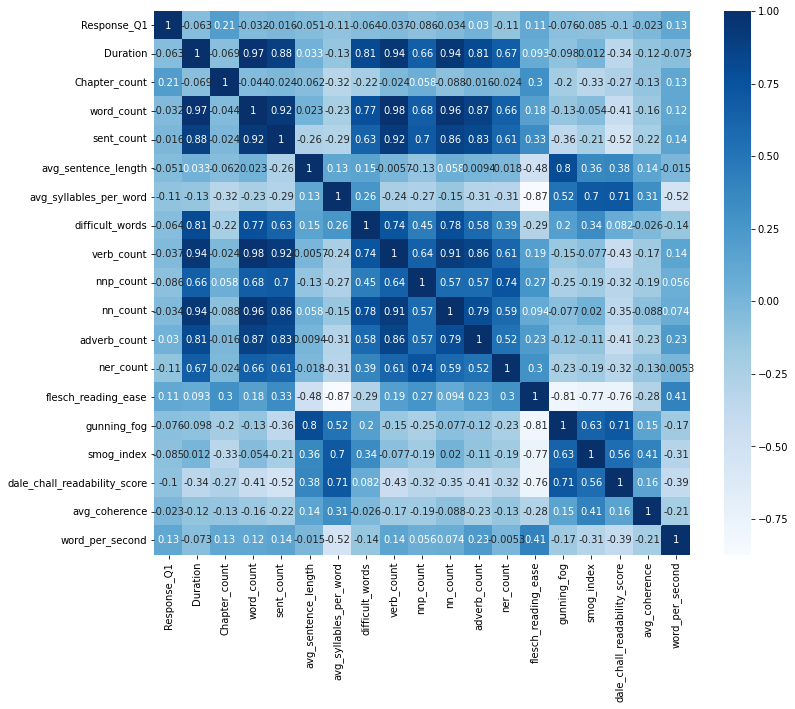

In [ ]:
# feature inspection - chapter level
# feature correlation
cor = chapter_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# feature inspection - course level

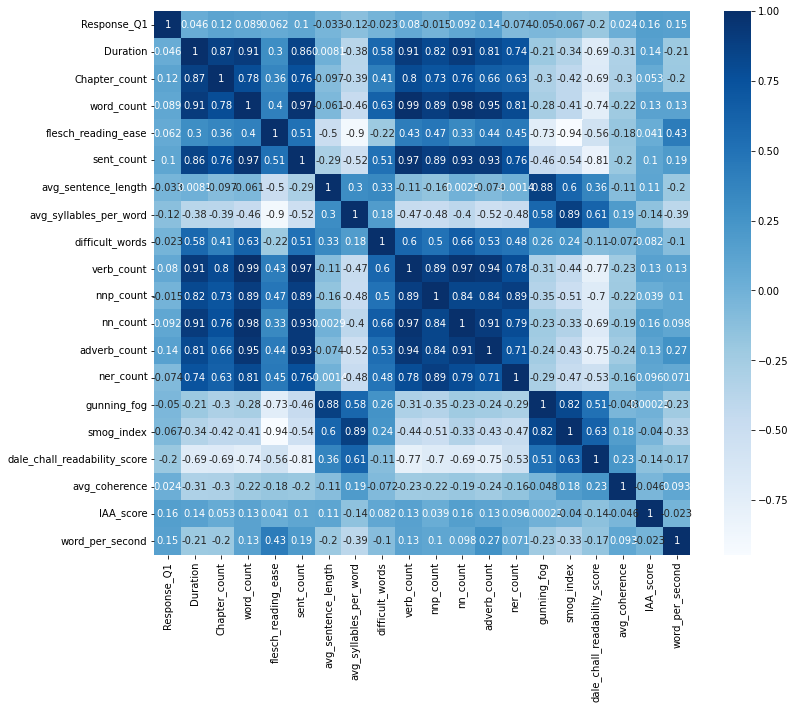

In [ ]:
# feature inspection - course level
# feature correlation
cor = course_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# Model training with course level data

In [ ]:
# course level 
final_df = course_df.drop(columns=['CourseName','Transcript','Duration'])
final_df.head()

# train test split
train_df, test_df = train_test_split(final_df, test_size = 0.15, random_state = 123)
X_train = train_df.drop(columns=["Response_Q1"])
X_test = test_df.drop(columns=["Response_Q1"])

y_train = train_df["Response_Q1"]
y_test = test_df["Response_Q1"]

# pipeline, models, results
results = {}
preprocessor = StandardScaler()
pipe_dummy = make_pipeline(preprocessor, DummyRegressor(strategy = 'mean'))
pipe_lr = make_pipeline(preprocessor, LinearRegression())
pipe_ridge = make_pipeline(preprocessor,Ridge())
pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))
pipe_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))
pipe_xgb = make_pipeline(preprocessor, XGBRegressor(random_state=123))
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123))
pipe_catboost = make_pipeline(
    preprocessor, CatBoostRegressor(verbose=0, random_state=123)
)

models = {
    "Dummy regressor": pipe_dummy,
    "Linear regression": pipe_lr,
    "Ridge regression": pipe_ridge,
    "Decision tree": pipe_dt,
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metrics
    )

pd.DataFrame(results)

[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Dummy regressor,Linear regression,Ridge regression,Decision tree,random forest,XGBoost,LightGBM,CatBoost
fit_time,0.004 (+/- 0.001),0.004 (+/- 0.000),0.004 (+/- 0.000),0.006 (+/- 0.001),0.163 (+/- 0.004),0.054 (+/- 0.022),0.022 (+/- 0.002),4.463 (+/- 0.526)
score_time,0.002 (+/- 0.000),0.002 (+/- 0.000),0.002 (+/- 0.000),0.003 (+/- 0.001),0.011 (+/- 0.003),0.005 (+/- 0.000),0.005 (+/- 0.001),0.010 (+/- 0.000)
test_neg_mean_squared_error,-0.030 (+/- 0.007),-0.039 (+/- 0.007),-0.037 (+/- 0.006),-0.050 (+/- 0.016),-0.029 (+/- 0.007),-0.033 (+/- 0.005),-0.034 (+/- 0.003),-0.032 (+/- 0.005)
train_neg_mean_squared_error,-0.030 (+/- 0.002),-0.022 (+/- 0.001),-0.022 (+/- 0.001),0.000 (+/- 0.000),-0.004 (+/- 0.000),-0.001 (+/- 0.000),-0.011 (+/- 0.001),-0.000 (+/- 0.000)
test_r2,-0.030 (+/- 0.037),-0.389 (+/- 0.365),-0.298 (+/- 0.337),-0.749 (+/- 0.634),-0.018 (+/- 0.204),-0.164 (+/- 0.298),-0.202 (+/- 0.260),-0.116 (+/- 0.155)
train_r2,0.000 (+/- 0.000),0.280 (+/- 0.042),0.257 (+/- 0.044),1.000 (+/- 0.000),0.864 (+/- 0.010),0.965 (+/- 0.007),0.620 (+/- 0.017),1.000 (+/- 0.000)


# Feature importance with best-performing model


In [ ]:
# random forest has the largest test neg mean squared error
pipe_rf.fit(X_train, y_train)

# feature importance
df_cols = list(final_df.columns) 
rm_list = ['CourseName','Transcript','length','Duration', 'Response_Q1']
feature_list = [i for i in df_cols if i not in rm_list]
data = {
    "Importance":pipe_rf.named_steps["randomforestregressor"].feature_importances_
}


rf_imp_df = pd.DataFrame(
    data=data,
    index=feature_list,
).sort_values(by="Importance", ascending=False)
print(rf_imp_df)
# eli5
eli5.explain_weights(pipe_rf.named_steps["randomforestregressor"], feature_names=feature_list)

                              Importance
word_per_second                 0.155904
IAA_score                       0.148374
avg_coherence                   0.112215
avg_sentence_length             0.080115
dale_chall_readability_score    0.068631
nnp_count                       0.052703
gunning_fog                     0.051379
adverb_count                    0.045395
smog_index                      0.040251
Chapter_count                   0.037173
ner_count                       0.036381
nn_count                        0.034054
difficult_words                 0.032689
flesch_reading_ease             0.031778
sent_count                      0.022857
avg_syllables_per_word          0.017711
verb_count                      0.016370
word_count                      0.016022


Weight,Feature
0.1559 ± 0.2009,word_per_second
0.1484 ± 0.1894,IAA_score
0.1122 ± 0.1904,avg_coherence
0.0801 ± 0.1494,avg_sentence_length
0.0686 ± 0.1518,dale_chall_readability_score
0.0527 ± 0.1302,nnp_count
0.0514 ± 0.1359,gunning_fog
0.0454 ± 0.1193,adverb_count
0.0403 ± 0.0927,smog_index
0.0372 ± 0.1072,Chapter_count


# Feature importance SHAP plot


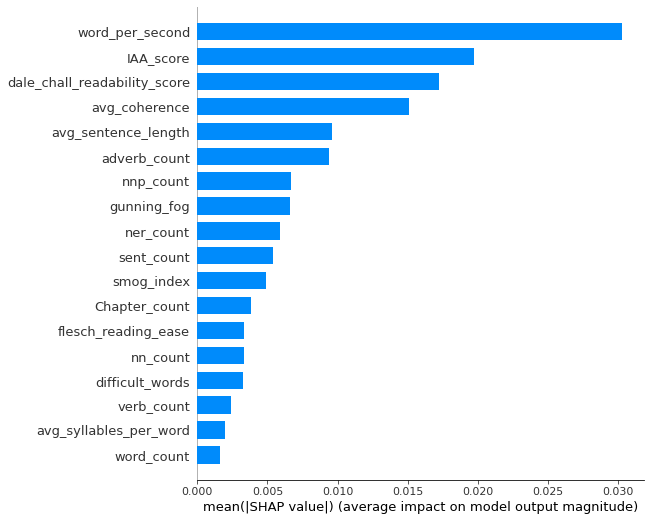

In [ ]:
# shap
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_list,
    index=X_train.index,
)


X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_list,
    index=X_test.index,
)

rf_explainer = shap.TreeExplainer(pipe_rf.named_steps["randomforestregressor"])
train_rf_shap_values = rf_explainer.shap_values(X_train_enc)
test_rf_shap_values = rf_explainer.shap_values(X_test_enc)

# global feature importances
shap.summary_plot(train_rf_shap_values, X_train_enc, plot_type="bar")

# Model traning with Chapter level data

In [ ]:
# chapter level 
# data cleaning
#read_df = course_df[['CourseName','Response_Q1']].merge(chapter_df, on='CourseName')
#final_df = read_df.drop(columns=['CourseName','Transcript','Duration', 'ChapterName', 'Chapter_count'])
#final_df.head()

# train test split
final_df = chapter_df.drop(columns=['CourseName','Transcript','Duration', 'ChapterName', 'Chapter_count'])
train_df, test_df = train_test_split(final_df, test_size = 0.15, random_state = 123)
X_train = train_df.drop(columns=["Response_Q1"])
X_test = test_df.drop(columns=["Response_Q1"])

y_train = train_df["Response_Q1"]
y_test = test_df["Response_Q1"]

# pipeline, models, results
results = {}
preprocessor = StandardScaler()
pipe_dummy = make_pipeline(preprocessor, DummyRegressor(strategy = 'mean'))
pipe_lr = make_pipeline(preprocessor, LinearRegression())
pipe_ridge = make_pipeline(preprocessor,Ridge())
pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))
pipe_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))
pipe_xgb = make_pipeline(preprocessor, XGBRegressor(random_state=123))
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123))
pipe_catboost = make_pipeline(
    preprocessor, CatBoostRegressor(verbose=0, random_state=123)
)

models = {
    "Dummy regressor": pipe_dummy,
    "Linear regression": pipe_lr,
    "Ridge regression": pipe_ridge,
    "Decision tree": pipe_dt,
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metrics
    )

pd.DataFrame(results)

[21:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Dummy regressor,Linear regression,Ridge regression,Decision tree,random forest,XGBoost,LightGBM,CatBoost
fit_time,0.011 (+/- 0.005),0.029 (+/- 0.013),0.034 (+/- 0.017),0.173 (+/- 0.032),5.120 (+/- 1.016),0.306 (+/- 0.005),0.224 (+/- 0.004),3.778 (+/- 0.025)
score_time,0.007 (+/- 0.005),0.010 (+/- 0.004),0.010 (+/- 0.008),0.006 (+/- 0.003),0.036 (+/- 0.000),0.006 (+/- 0.000),0.011 (+/- 0.001),0.006 (+/- 0.001)
test_neg_mean_squared_error,-0.034 (+/- 0.001),-0.033 (+/- 0.001),-0.033 (+/- 0.001),-0.061 (+/- 0.004),-0.031 (+/- 0.001),-0.031 (+/- 0.001),-0.031 (+/- 0.001),-0.030 (+/- 0.001)
train_neg_mean_squared_error,-0.034 (+/- 0.000),-0.032 (+/- 0.000),-0.032 (+/- 0.000),-0.000 (+/- 0.000),-0.004 (+/- 0.000),-0.025 (+/- 0.000),-0.013 (+/- 0.000),-0.010 (+/- 0.000)
test_r2,-0.000 (+/- 0.000),0.051 (+/- 0.003),0.051 (+/- 0.003),-0.774 (+/- 0.146),0.104 (+/- 0.040),0.100 (+/- 0.036),0.098 (+/- 0.036),0.129 (+/- 0.033)
train_r2,0.000 (+/- 0.000),0.061 (+/- 0.001),0.061 (+/- 0.001),1.000 (+/- 0.000),0.876 (+/- 0.001),0.265 (+/- 0.008),0.627 (+/- 0.006),0.696 (+/- 0.014)


# Hypterparameter tuning with best performing model

In [ ]:
# Hyperparameter tuning for catboost
model_CBR = CatBoostRegressor(verbose=0)
parameters = {'depth': [6,8,10],'learning_rate' : [0.01, 0.05, 0.1],'iterations': [30, 50, 100]}

random_search = RandomizedSearchCV(
    model_CBR,
    param_distributions=parameters,
    n_jobs=-1,
    n_iter=20,
    cv=5,
    random_state=123,
    return_train_score=True,
    scoring = 'r2'
)
random_search.fit(X_train, y_train)

pd.DataFrame(random_search.cv_results_).set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
mean_fit_time,6.636225,3.397933,2.298421,0.941814,1.190305,2.529181,1.147383,0.606063,0.769105,3.325774,0.608942,0.31047,6.681784,2.420736,4.448914,1.156909,0.514477,0.732408,2.000141,0.353911
std_fit_time,0.222678,0.126522,0.126995,0.12723,0.048206,0.645184,0.028234,0.040036,0.033909,0.098801,0.04792,0.067151,0.102465,0.062001,0.521887,0.042586,0.067683,0.018947,0.05368,0.039137
mean_score_time,0.010091,0.006333,0.008217,0.006826,0.007593,0.007738,0.007787,0.006443,0.008036,0.007165,0.006466,0.00621,0.008954,0.008228,0.008092,0.007875,0.006481,0.007999,0.007231,0.007397
std_score_time,0.004601,0.001699,0.000117,0.0017,0.001105,0.001809,0.000638,0.001517,0.000195,0.00236,0.002087,0.002284,0.000277,0.000342,0.003428,0.001993,0.001985,0.000252,0.00267,0.001228
param_learning_rate,0.1,0.1,0.05,0.1,0.1,0.1,0.05,0.1,0.1,0.05,0.05,0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
param_iterations,100,50,100,100,50,30,100,50,30,50,50,30,100,100,50,50,50,30,30,30
param_depth,10,10,8,6,8,10,6,6,8,10,6,6,10,8,10,8,6,8,10,6
params,"{'learning_rate': 0.1, 'iterations': 100, 'dep...","{'learning_rate': 0.1, 'iterations': 50, 'dept...","{'learning_rate': 0.05, 'iterations': 100, 'de...","{'learning_rate': 0.1, 'iterations': 100, 'dep...","{'learning_rate': 0.1, 'iterations': 50, 'dept...","{'learning_rate': 0.1, 'iterations': 30, 'dept...","{'learning_rate': 0.05, 'iterations': 100, 'de...","{'learning_rate': 0.1, 'iterations': 50, 'dept...","{'learning_rate': 0.1, 'iterations': 30, 'dept...","{'learning_rate': 0.05, 'iterations': 50, 'dep...","{'learning_rate': 0.05, 'iterations': 50, 'dep...","{'learning_rate': 0.05, 'iterations': 30, 'dep...","{'learning_rate': 0.01, 'iterations': 100, 'de...","{'learning_rate': 0.01, 'iterations': 100, 'de...","{'learning_rate': 0.01, 'iterations': 50, 'dep...","{'learning_rate': 0.01, 'iterations': 50, 'dep...","{'learning_rate': 0.01, 'iterations': 50, 'dep...","{'learning_rate': 0.01, 'iterations': 30, 'dep...","{'learning_rate': 0.01, 'iterations': 30, 'dep...","{'learning_rate': 0.01, 'iterations': 30, 'dep..."
split0_test_score,0.126771,0.114769,0.10965,0.110503,0.110763,0.108967,0.102871,0.097817,0.099358,0.102472,0.088142,0.074146,0.070943,0.069796,0.046118,0.044862,0.045118,0.030701,0.030418,0.030653
split1_test_score,0.141336,0.13074,0.133893,0.125325,0.121161,0.116193,0.122034,0.115936,0.112409,0.115758,0.105984,0.089339,0.082661,0.08159,0.050619,0.052705,0.049665,0.035187,0.033811,0.032788


In [ ]:
print('Best hyperparameter values:')
print(random_search.best_params_)

print('The best r2 score:')
print(random_search.best_score_)

Best hyperparameter values:
{'learning_rate': 0.1, 'iterations': 100, 'depth': 10}
The best r2 score:
0.1341675459927093


# Model performance after hyperparameter tuning

In [ ]:
# catboost best hyperpameters 
lr = random_search.best_params_['learning_rate']
n_iterations = random_search.best_params_['iterations']
n_depth = random_search.best_params_['depth']


pipe_best = CatBoostRegressor(learning_rate = lr,iterations = n_iterations, depth = n_depth, random_state=123, verbose=0)

results = {}
results["best_model"] = mean_std_cross_val_scores(
    pipe_best, X_train, y_train, return_train_score=True, scoring=scoring_metrics
)

pd.DataFrame(results)

,best_model
fit_time,3.190 (+/- 0.029)
score_time,0.004 (+/- 0.000)
test_neg_mean_squared_error,-0.030 (+/- 0.001)
train_neg_mean_squared_error,-0.016 (+/- 0.000)
test_r2,0.134 (+/- 0.032)
train_r2,0.532 (+/- 0.012)


# Feature importance with best model

In [ ]:
pipe_best.fit(X_train, y_train)

# feature importance
df_cols = list(final_df.columns) 
rm_list = ['CourseName','Transcript','length','Duration', 'Response_Q1']
feature_list = [i for i in df_cols if i not in rm_list]
data = {
    "Importance":pipe_best.feature_importances_
}


final_imp_df = pd.DataFrame(
    data=data,
    index=feature_list,
).sort_values(by="Importance", ascending=False)
print(final_imp_df)
# eli5
eli5.explain_weights(pipe_best, feature_names=feature_list)

                              Importance
word_per_second                20.041522
avg_coherence                   8.726193
ner_count                       8.106571
avg_sentence_length             7.473277
dale_chall_readability_score    7.405632
nnp_count                       7.012582
adverb_count                    6.911960
gunning_fog                     4.985522
nn_count                        4.686529
smog_index                      4.605581
difficult_words                 4.554509
flesch_reading_ease             4.067618
verb_count                      4.001499
avg_syllables_per_word          2.644807
sent_count                      2.431926
word_count                      2.344272


Weight,Feature
0.2004,word_per_second
0.0873,avg_coherence
0.0811,ner_count
0.0747,avg_sentence_length
0.0741,dale_chall_readability_score
0.0701,nnp_count
0.0691,adverb_count
0.0499,gunning_fog
0.0469,nn_count
0.0461,smog_index


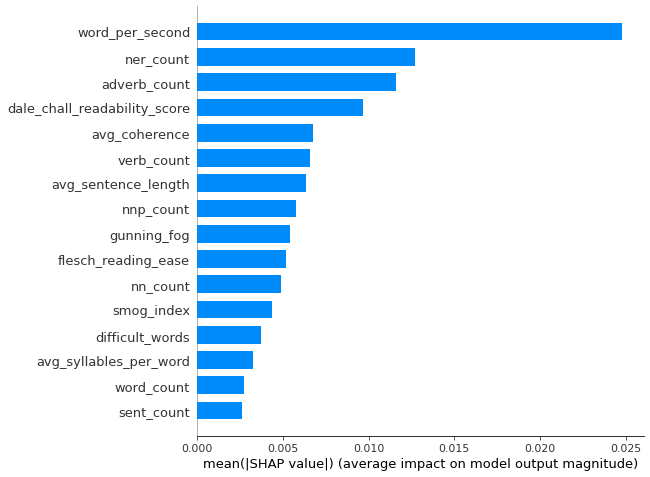

In [ ]:
# shap for best model
X_train_enc = pd.DataFrame(
    data=X_train,
    columns=feature_list,
    index=X_train.index,
)


X_test_enc = pd.DataFrame(
    data=X_test,
    columns=feature_list,
    index=X_test.index,
)

rf_explainer = shap.TreeExplainer(pipe_best)
train_rf_shap_values = rf_explainer.shap_values(X_train_enc)
test_rf_shap_values = rf_explainer.shap_values(X_test_enc)

# global feature importances
shap.summary_plot(train_rf_shap_values, X_train_enc, plot_type="bar")

# Feature selection with RFE

In [ ]:
# feature selection
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

results = {}

pipe_rfe_ridgecv = make_pipeline(StandardScaler(), RFECV(RidgeCV(), cv=3), 
                              CatBoostRegressor(learning_rate = lr,iterations = n_iterations, depth = n_depth, random_state=123, verbose=0))



pipe_rfe_poly = make_pipeline(StandardScaler(), PolynomialFeatures(), RFECV(RidgeCV(), cv=3), 
                              CatBoostRegressor(learning_rate = lr,iterations = n_iterations, depth = n_depth, random_state=123, verbose=0))


pipe_poly_back = make_pipeline(StandardScaler(), PolynomialFeatures(), 
                               SequentialFeatureSelector(RandomForestRegressor(), direction="forward"),
                               CatBoostRegressor(learning_rate = lr,iterations = n_iterations, depth = n_depth, random_state=123, verbose=0))

results["RFECV"] = mean_std_cross_val_scores(
    pipe_rfe_ridgecv, X_train, y_train,cv = 2, return_train_score=True
)
results["RFEPOLY"] = mean_std_cross_val_scores(
    pipe_rfe_poly, X_train, y_train,cv = 2, return_train_score=True
)

#results["POLYBACK"] = mean_std_cross_val_scores(pipe_poly_back, X_train, y_train,cv = 2, return_train_score=True)

pd.DataFrame(results)

,RFECV,RFEPOLY
fit_time,2.719 (+/- 0.317),35.344 (+/- 5.559)
score_time,0.006 (+/- 0.001),0.011 (+/- 0.001)
test_score,0.062 (+/- 0.048),0.090 (+/- 0.004)
train_score,0.540 (+/- 0.065),0.710 (+/- 0.026)


In [ ]:
pipe_rfe_ridgecv.fit(X_train, y_train)
rfecv_no = pipe_rfe_ridgecv["rfecv"].n_features_
print('Number of features have been selected by RFECV:', rfecv_no)
rfecv_name = pipe_rfe_ridgecv["rfecv"].get_feature_names_out()
print('Feature names have been selected by RFECV:', rfecv_name)

Number of features have been selected by RFECV: 16
Feature names have been selected by RFECV: ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15']


In [ ]:
pipe_rfe_ridgecv["rfecv"].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15'], dtype=object)